<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# What to expect in this chapter

In the previous chapter, we saw how you could use Matplotlib to produce simple, decent-looking plots. However, we haven’t really (barely) tapped the full power of what Matplotlib can do. For this, I need to introduce you to a different way of speaking to Matplotlib. So far, the ‘dialect’ we have used to talk to Matplotlib is called the Matlab-like pyplot(plt) interface. From here onward, I will show you how to use the other, more powerful ‘dialect’ called the Object Oriented (OO) interface. This way of talking to Matplotlib gives us a more nuanced control over what is going on by allowing us to manipulate the various axes easily.

# 1 Some nomenclature

**Matplotlib figure vs axis**

Figure: full canvas that can be used to draw stuff on. 
One figure can have multiple axes.

Axis: individual mathematical axes we use for plotting


# 2 Comparing the two ‘dialects’

In [3]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

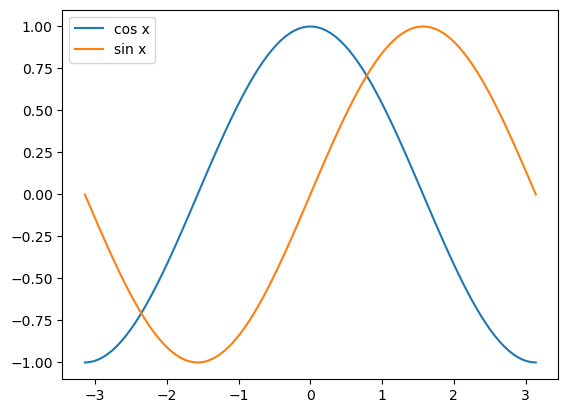

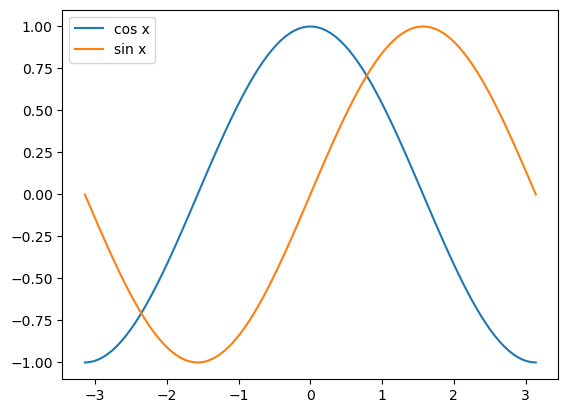

In [4]:
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()
plt.show()

### OO Interface

For the OO interface, we have to start by using `subplots()` to ask Matplotlib to create a figure and an axis. Matplotlib obliges and gives us a figure (`fig`) and an axis (`ax`).

Although I have used the variables `fig` and `ax` you are free to call them what you like. But this is what is commonly used in the documentation. In this example, I need only one column and one row. But, if I want, I can ask for a grid like in the plot right at the top.

Yes, the OO looks more complicated than the `pyplot` version. But, it offers so much freedom that it is worth learning it for more demanding, complex plots.

# 3 What is OO ax, really?

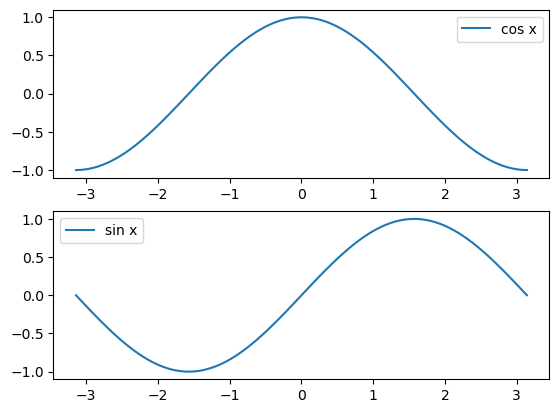

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1)  #2 rows, 1 column

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()
plt.show()

In [6]:
type(ax)

numpy.ndarray

`ax` is a NumPy array.

In [7]:
ax.shape

(2,)

`ax` has two ‘things’.

In [8]:
type(ax[0])

matplotlib.axes._axes.Axes

`ax` is a Matplotlib axis

# 4 A complete OO example

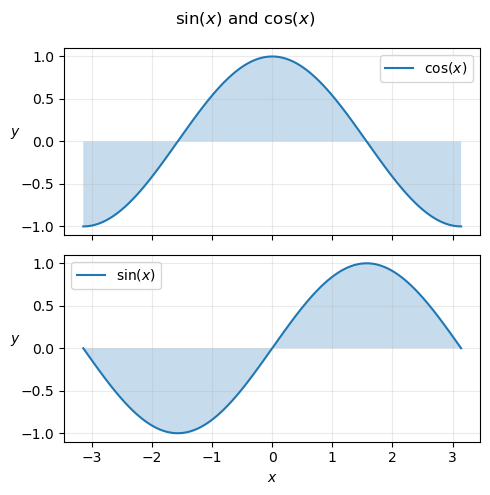

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1,   #create 2 axes in 2 rows in 1 column
                       figsize=(5, 5),     #specify figure size
                       sharex=True)        #plots share same x-axis
ax[0].plot(x, cos_x, label=r'$\cos(x)$')   #plot axis 1
ax[0].fill_between(x, 0, cos_x, alpha=.25) #fill the plot
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

#draw legend for both axes
for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')     #set x-axis for both (since they share the same x-axis)

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')   #add super title to figure

#ask Matplotlib to make any necessary adjustments to the 
#layout to make our plot look nice
fig.tight_layout()   

**Note!!!**

Unfortunately, the `pyplot` and OO interfaces don’t use identical function names. For example, `pyplot` used `xlabel()` to set the x label, but OO uses `set_xlabel()`. 

# 5 Multiple rows and columns

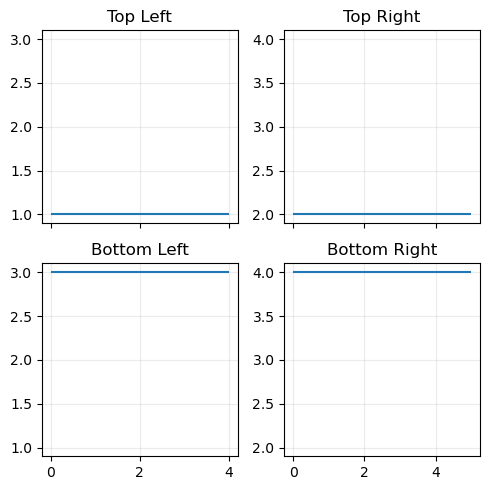

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

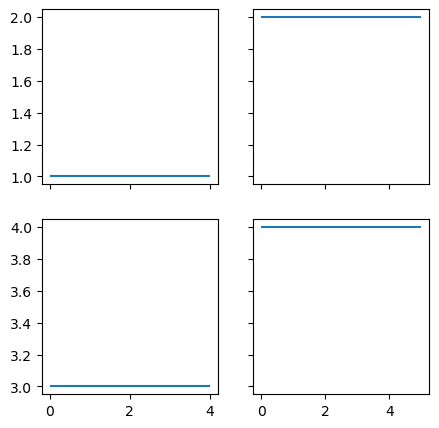

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')
ax[0,0].hlines(y=1, xmin=0, xmax=4)
ax[0,1].hlines(y=2, xmin=0, xmax=5)
ax[1,0].hlines(y=3, xmin=0, xmax=4)
ax[1,1].hlines(y=4, xmin=0, xmax=5)
plt.show()

In [16]:
#ax is a 2 x 2 array
ax.shape

(2, 2)

In [9]:
#to access each of the axes
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

Text(0.5, 1.0, 'Bottom Right')

In [10]:
#alternative
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

In [11]:
#alternative 2
top_left, top_right, bottom_left, bottom_right = ax.flatten()

`flatten()` takes the 2D array and ‘flattens’ it into a 1D array; unpacking takes care of the assignments.

In [22]:
#to draw the lines
top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## 5.1 Sharing axes

Use Matplotlib to make the plots more compact by sharing the x and y axes using `sharex` and `sharey`

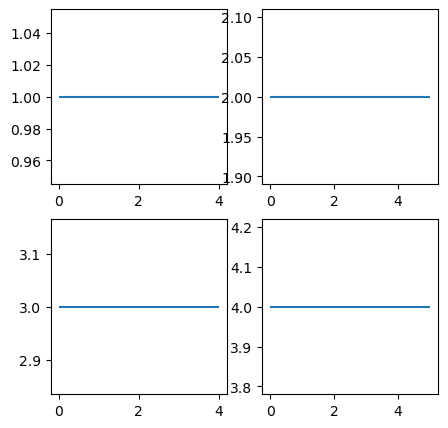

In [11]:
#if dont specify how to share, Matplotlib will auto-scale both axes

fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5)
)

ax[0,0].hlines(y=1, xmin=0, xmax=4)
ax[0,1].hlines(y=2, xmin=0, xmax=5)
ax[1,0].hlines(y=3, xmin=0, xmax=4)
ax[1,1].hlines(y=4, xmin=0, xmax=5)
plt.show()

How to share axes:

|Option|	Result|
|:---|:---|
|`True`|	Makes all the axes use the same range.|
|`col`|	Use the same range for all the columns|
|`row`|	Use the same range for all the rows|

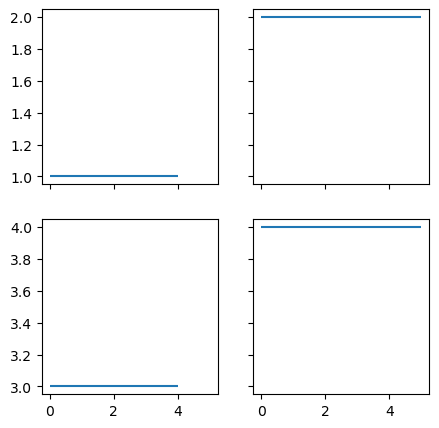

In [12]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)

ax[0,0].hlines(y=1, xmin=0, xmax=4)
ax[0,1].hlines(y=2, xmin=0, xmax=5)
ax[1,0].hlines(y=3, xmin=0, xmax=4)
ax[1,1].hlines(y=4, xmin=0, xmax=5)
plt.show()

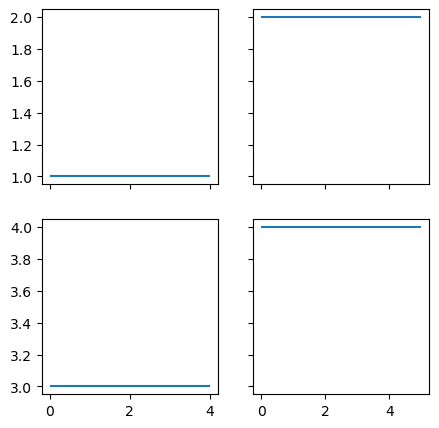

In [13]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

ax[0,0].hlines(y=1, xmin=0, xmax=4)
ax[0,1].hlines(y=2, xmin=0, xmax=5)
ax[1,0].hlines(y=3, xmin=0, xmax=4)
ax[1,1].hlines(y=4, xmin=0, xmax=5)
plt.show()

## 5.2 Accessing all axes

In [15]:
# apply changes to all axes

top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

In [16]:
#alternative

for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

### Data

### A quick helper function

In [18]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

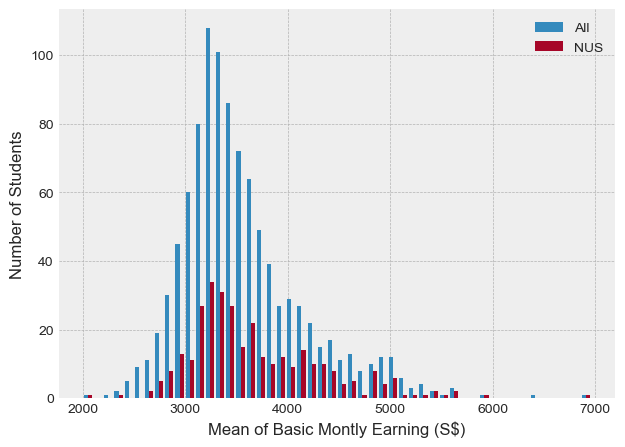

In [19]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

## 6.2 Scatter plots

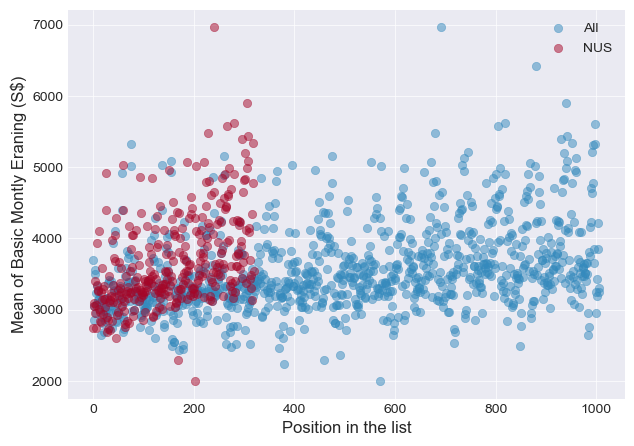

In [20]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()
plt.show()

## 6.3 Bar charts

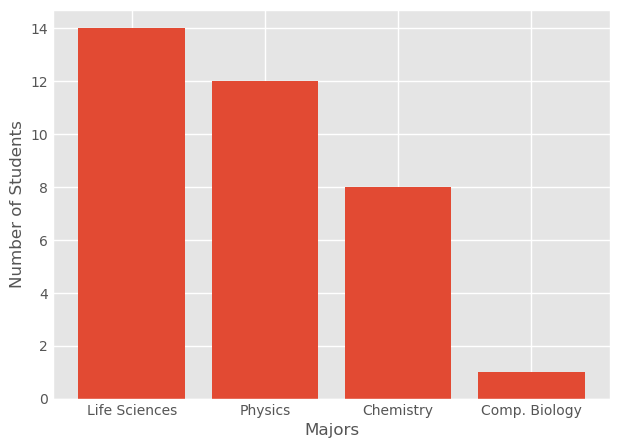

In [15]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')
plt.show()

## 6.4 Pie charts

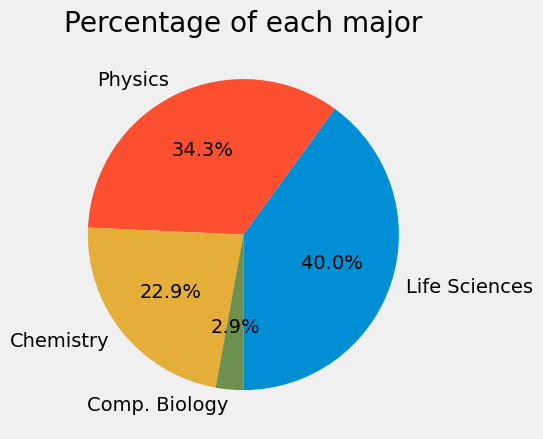

In [14]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')
plt.show()